In this dataset I am going to work on hotels in gaujarath and goiong to make predictions on how much ratings a hotel would get.

Credits:
Attribution-ShareAlike 4.0 International
   CC BY-SA 4.0
Deed

In [2]:
# Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Analysis

In [3]:
# Load the dataset

df = pd.read_csv("/Users/dhanrajtentu/Downloads/Projects/Gujarath Hotel/final_hotel.csv")

# View some data
df.head()

,hotel name,rating,rating text,place,near by place,discount price,actual price,facilities,destination name,Unnamed: 9,Unnamed: 10
0,The Fern Sattva Resort - Polo Forest,4.3,Excellent,Abhapur,96.8 km from Ambaji city centre,3896,6449,Spa,Ambaji,NaN,NaN
1,Pride Resort Ambaji,3.8,Very Good,Ambaji,Not Available,2171,2875,Swimming Pool,Ambaji,NaN,NaN
2,Royal Inn Hotel,3.9,Very Good,Danta Road,Not Available,1356,2600,Restaurant,Ambaji,NaN,NaN
3,hotel leela residency,3.9,Very Good,Khodiyar Chowk,Not Available,1282,1500,Air Conditioning,Ambaji,NaN,NaN
4,HOTEL KARDHAR INN,4.2,Very Good,Khodiyar Chowk,Not Available,1563,3000,Butler Services,Ambaji,NaN,NaN


In [4]:
df.tail()

,hotel name,rating,rating text,place,near by place,discount price,actual price,facilities,destination name,Unnamed: 9,Unnamed: 10
2360,Hotel Vardhan,3.1,Good,"Naroli Road, Silvassa",24.3 km from Valsad District,1281,1800,Restaurant,Valsad,NaN,NaN
2361,Hotel The Seven,3.0,Good,"Naroli Road, Silvassa",24.4 km from Valsad District,3169,7249,Gym,Valsad,NaN,NaN
2362,Yatri Niwas,3.8,Very Good,"Naroli Road, Silvassa",24.8 km from Valsad District,2786,3999,Restaurant,Valsad,NaN,NaN
2363,Hotel Suraj,3.5,Very Good,"Naroli Road, Silvassa",24.8 km from Valsad District,1753,2499,24-hour Room service,Valsad,NaN,NaN
2364,Ras Resorts by Treat,3.9,Very Good,"Naroli Road, Silvassa",25.2 km from Valsad District,7211,12199,Swimming Pool,Valsad,NaN,NaN


In [5]:
# GEt the shape
df.shape

(2365, 11)

In [6]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hotel name        2365 non-null   object 
 1   rating            2365 non-null   float64
 2   rating text       2365 non-null   object 
 3   place             2365 non-null   object 
 4   near by place     2365 non-null   object 
 5   discount price    2365 non-null   int64  
 6   actual price      2365 non-null   int64  
 7   facilities        2365 non-null   object 
 8   destination name  2365 non-null   object 
 9   Unnamed: 9        0 non-null      float64
 10  Unnamed: 10       0 non-null      float64
dtypes: float64(3), int64(2), object(6)
memory usage: 203.4+ KB


In [7]:
# Remove last two columns
df.drop(columns=['Unnamed: 9', 'Unnamed: 10'], inplace=True)

In [8]:
df.shape

(2365, 9)

In [9]:
# Check missing values
df.isna().sum()

hotel name          0
rating              0
rating text         0
place               0
near by place       0
discount price      0
actual price        0
facilities          0
destination name    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# Get summary Statastics
df.describe()

,rating,discount price,actual price
count,2365.000000,2365.000000,2365.000000
mean,3.540761,2483.551797,3435.785201
std,0.613404,2595.499833,3330.495465
min,1.000000,305.000000,400.000000
25%,3.300000,1242.000000,1800.000000
50%,3.500000,1733.000000,2519.000000
75%,3.900000,2721.000000,4000.000000
max,5.000000,45000.000000,50000.000000


In [12]:
# Get counts
print(df['rating text'].value_counts())
print(df['facilities'].value_counts())

rating text
Very Good    1324
Good          469
Average       292
Excellent     232
Poor           48
Name: count, dtype: int64
facilities
Restaurant               638
24-hour Room service     545
24-hour Room Service     330
Swimming Pool            133
Spa                      115
Gym                      110
Fireplace                 62
Jacuzzi                   60
Air Conditioning          47
Lounge                    45
Caretaker                 39
Butler Services           33
Shared Swimming Pool      26
Bonfire                   23
Kitchenette               18
Private Swimming Pool     15
Luggage Storage           13
Living Room               12
Indoor Games              11
Free Wi-Fi                 9
Reception                  8
Shared Kitchen             8
Kids Play Area             7
Jungle Safari              7
Water Sports               6
Housekeeping               6
Private Kitchen            5
Lawn                       5
Private Beach              5
Shared Parking      

In [13]:
# Adjust the typo error on facilite with 24 hour room service
df['facilities'] = df['facilities'].str.title()

In [14]:
df['facilities'].value_counts()

facilities
24-Hour Room Service     875
Restaurant               638
Swimming Pool            133
Spa                      115
Gym                      110
Fireplace                 62
Jacuzzi                   60
Air Conditioning          47
Lounge                    45
Caretaker                 39
Butler Services           33
Shared Swimming Pool      26
Bonfire                   23
Kitchenette               18
Private Swimming Pool     15
Luggage Storage           13
Living Room               12
Indoor Games              11
Free Wi-Fi                 9
Reception                  8
Shared Kitchen             8
Jungle Safari              7
Kids Play Area             7
Housekeeping               6
Water Sports               6
Private Beach              5
Lawn                       5
Private Kitchen            5
Shared Parking             4
Private Living Room        3
Free Parking               3
Seating Area               3
Power Backup               2
Washing Machine            1
Yog

In [15]:
# get column name
df.columns

Index(['hotel name', 'rating', 'rating text', 'place', 'near by place',
       'discount price', 'actual price', 'facilities', 'destination name'],
      dtype='object')

# 2. Data Visualisations

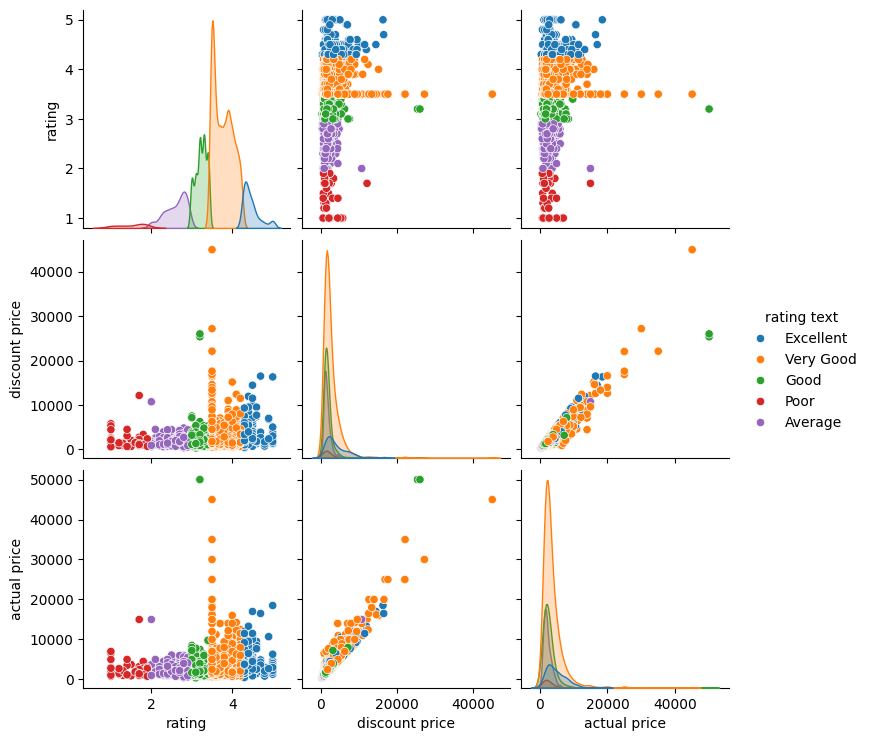

In [16]:
# Pair Plot
sns.pairplot(df,hue='rating text')
plt.show()

In [17]:
# sort the values
df.sort_values(by='rating', ascending=False, inplace=True)

In [18]:
df.columns

Index(['hotel name', 'rating', 'rating text', 'place', 'near by place',
       'discount price', 'actual price', 'facilities', 'destination name'],
      dtype='object')

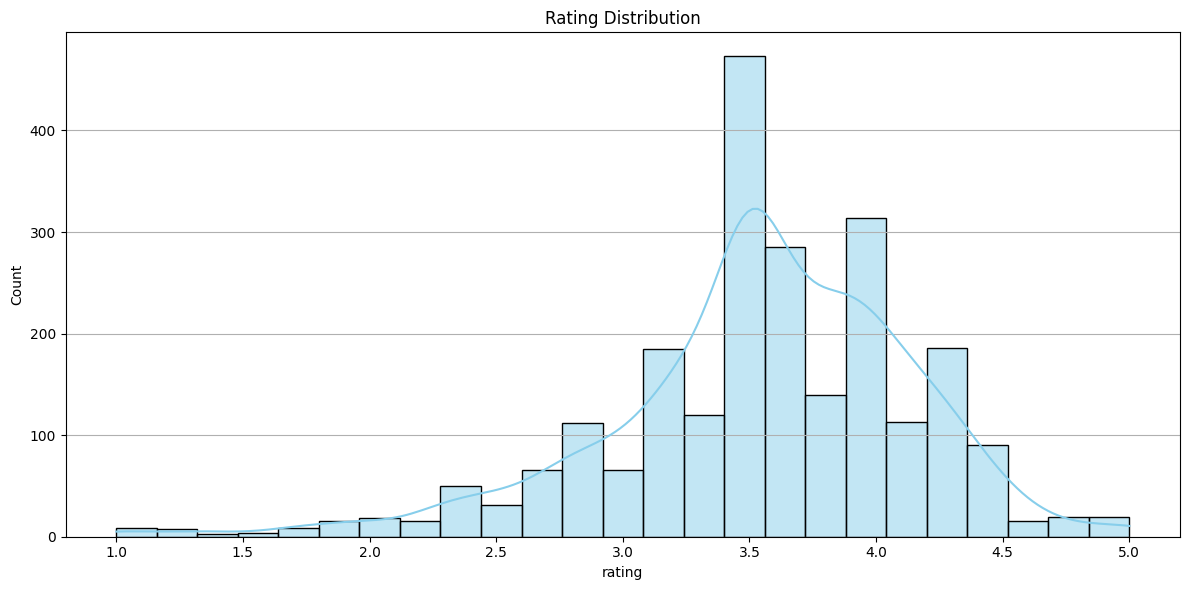

In [19]:
# Rating Distribution
plt.figure(figsize=(12,6))
sns.histplot(data=df ,x ='rating', kde=True, bins=25,color='skyblue')
plt.title("Rating Distribution")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

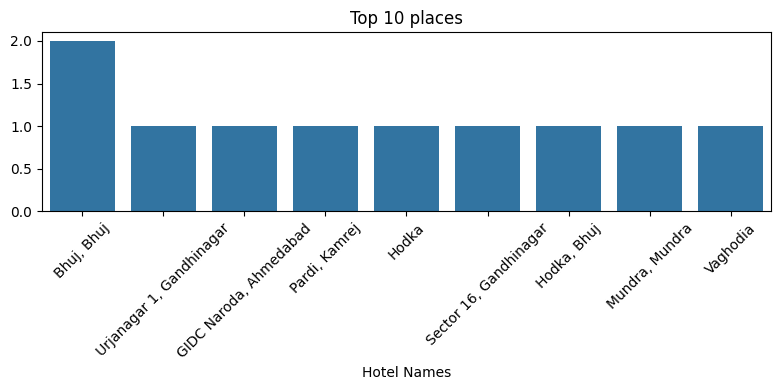

In [20]:
# Top places
plt.figure(figsize=(8,4))
sns.barplot(x=df['place'].head(10).value_counts().index, y=df['place'].head(10).value_counts().values)
plt.title("Top 10 places")
plt.xlabel("Hotel Names")
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

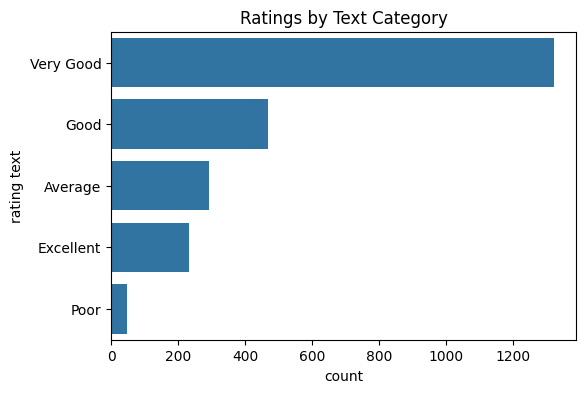

In [21]:
# rating text count
plt.figure(figsize=(6,4))
sns.countplot(y=df['rating text'], order=df['rating text'].value_counts().index)
plt.title('Ratings by Text Category')
plt.show()


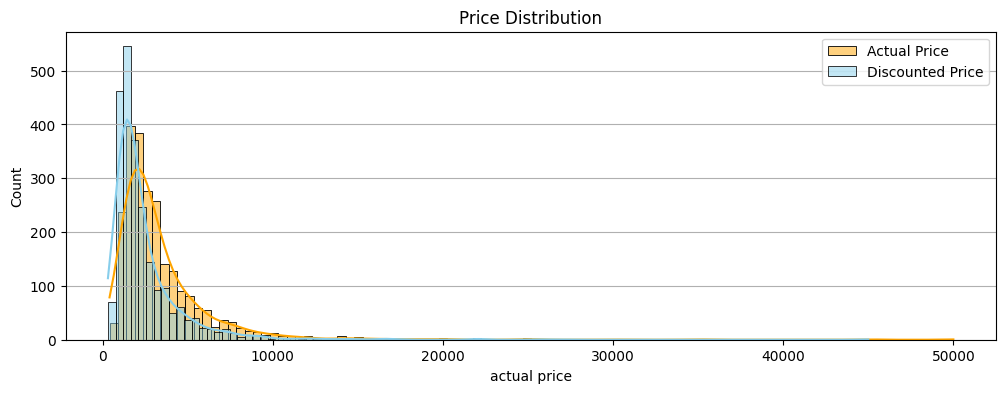

In [22]:
# price Distribution
plt.figure(figsize=(12,4))
sns.histplot(df['actual price'], kde=True, bins=100, label="Actual Price", color='orange')
sns.histplot(df['discount price'] , kde=True, bins=100, label='Discounted Price', color='skyblue')
plt.title("Price Distribution")
plt.grid(axis='y')
plt.legend()
plt.show()

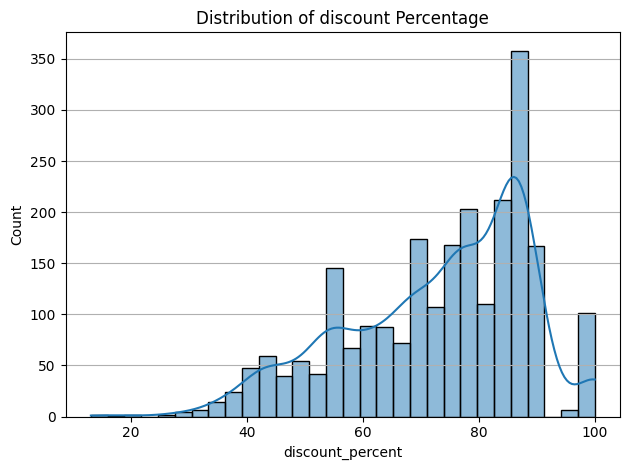

In [23]:
# Discounted price percentage distribution
df['discount_percent'] = df['discount price'] / df['actual price'] * 100
# plot
sns.histplot(df['discount_percent'], kde=True, bins=30)
plt.title("Distribution of discount Percentage")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

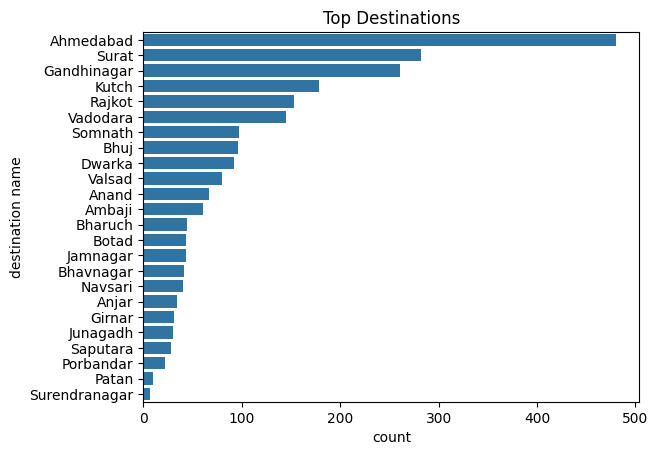

In [24]:
sns.countplot(y=df['destination name'], order=df['destination name'].value_counts().index)
plt.title('Top Destinations')
plt.show()


# 3. Data Preprocessing and Model selection

Let us create a model to find the rating text

In [30]:
df.columns

Index(['hotel name', 'rating', 'rating text', 'place', 'near by place',
       'discount price', 'actual price', 'facilities', 'destination name',
       'discount_percent'],
      dtype='object')

In [29]:
len(df.columns)

10

In [26]:
df

,hotel name,rating,rating text,place,near by place,discount price,actual price,facilities,destination name,discount_percent
443,Hotel Bellevue,5.0,Excellent,"Urjanagar 1, Gandhinagar",Not Available,3938,4500,Restaurant,Gandhinagar,87.511111
566,THE GRAND PIANO HOTEL,5.0,Excellent,"GIDC Naroda, Ahmedabad",20.7 km from Gandhinagar District,1331,1800,24-Hour Room Service,Gandhinagar,73.944444
1315,The Augusta Club & Resort,5.0,Excellent,"Pardi, Kamrej",Not Available,5013,6299,Gym,Surat,79.584061
819,Hotel Hastik,5.0,Excellent,"Bhuj, Bhuj",23.6 km from city centre,1413,2241,Butler Services,Kutch,63.052209
264,Rann Niwas Village Stay,5.0,Excellent,Hodka,62.6 km from city centre,3553,4000,24-Hour Room Service,Bhuj,88.825000
...,...,...,...,...,...,...,...,...,...,...
876,Hotel Gajanand Palace,1.0,Poor,"Mundra, Mundra",Not Available,5266,7000,Restaurant,Kutch,75.228571
1616,Hotel Green Park,1.0,Poor,Tarsali,Not Available,2135,2800,Lounge,Vadodara,76.250000
560,Hotel The Crown,1.0,Poor,"GIDC Naroda, Ahmedabad",17.9 km from Gandhinagar District,553,799,24-Hour Room Service,Gandhinagar,69.211514
492,HOTEL PANCH,1.0,Poor,"G.I.D.C. Estate, Kalol",17.5 km from Gandhinagar District,1601,1850,Restaurant,Gandhinagar,86.540541


In [55]:
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Split the data
X = df.drop(['rating text', 'discount_percent'], axis=1)
y = df['rating text']


# Select Categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.to_list()

# Create one hot encoder
encoder= OneHotEncoder(sparse_output=False)

# Fit transform categorical columns
X_cat =encoder.fit_transform(X[categorical_cols])

# Convert to DF with new columns
X_cat_df = pd.DataFrame(X_cat, columns= encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and add encoded ones
X_transformed = pd.concat([X.drop(columns=categorical_cols).reset_index(drop=True),
                           X_cat_df.reset_index(drop=True)], axis=1)

#Scale only numeric data
numeric_cols = X.drop(columns=categorical_cols).columns

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[numeric_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=scaler.get_feature_names_out(numeric_cols))
#Concat
X_transformed = pd.concat([X_scaled_df.reset_index(drop=True), X_cat_df.reset_index(drop=True)], axis=1)

# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


# Create a dict to loop through models
models = {
    "Logistic Regression" : LogisticRegression(max_iter=500),
    "K-Neighbours" : KNeighborsClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Scores: \n{name}: {acc}")
    print("--"*50)
    print(f"{name}: \n{classification_report(y_test, y_pred)}")



/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sk

Accuracy Scores: 
Logistic Regression: 0.718816067653277
----------------------------------------------------------------------------------------------------
Logistic Regression: 
              precision    recall  f1-score   support

     Average       0.70      0.46      0.55        50
   Excellent       0.94      0.32      0.48        47
        Good       0.60      0.31      0.41        94
        Poor       1.00      0.12      0.22         8
   Very Good       0.73      0.99      0.84       274

    accuracy                           0.72       473
   macro avg       0.79      0.44      0.50       473
weighted avg       0.72      0.72      0.68       473

Accuracy Scores: 
K-Neighbours: 0.7526427061310782
----------------------------------------------------------------------------------------------------
K-Neighbours: 
              precision    recall  f1-score   support

     Average       0.60      0.54      0.57        50
   Excellent       0.74      0.49      0.59        47
 

/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
